Extendendo o conteúdo da primeira parte, agora iremos nos preocupar em como analisar o comportamento de duas ou mais variáveis, que é o que ocorre na prática. 

Os dados estão geralmente dispostos em formas de matriz, com $n$ indíviduos na primeira coluna e as subsequentes $p$ colunas: $x_1,x_2,...,x_p$ com as variáveis do estudo.

Podemos ter três situações distintas ao trabalhar com mais de uma variável:

- Todas são qualitativas;
- Todas são quantitativas;
- Associação entre quantitativas e qualitativas.

Em cada caso as técnicas utilizadas são diferentes, porém o objetivo é sempre o mesmo: Encontrar se existe uma associação entre as variáveis.
Considere o seguinte exemplo: Imagine uma população $A$, composta de homens e mulheres. Sabemos que geralmente existe uma associação entre sexo e altura - pessoas do sexo masculino tendem a serem mais altas. Dessa forma, qual seria a chance de encontrar uma pessoa nessa população A com mais de 1,70 do grupo dos homens? E do grupo de mulheres? Se a chance for diferente para os dois grupos, podemos dizer que existe uma associação entre sexo e altura. (mais para frente discutiremos associações espúrias)

# Análise de variáveis qualitativas

- Tabelas de dupla entrada

    Vamos trabalhar com a tabela 2.1, nela iremos analisar o comportamento das váriaveis Y(grau de escolaridade) e V(região de procedência).

In [28]:
# Importar bibiliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ler tabela
t21 = pd.read_csv("Tabelas/tabela_2_1.csv")

In [75]:
# Tabela de região x escolaridade
tab_regiao = pd.crosstab(index=t21["V"], 
                           columns=t21["Y"],
                          margins=True)
tab_regiao.index = ["Capital","Interior","Outra","col_total"]
tab_regiao.columns = ["Fundamental","Médio","Superior","row_total"]

tab_regiao


,Fundamental,Médio,Superior,row_total
Capital,4,5,2,11
Interior,3,7,2,12
Outra,5,6,2,13
col_total,12,18,6,36


A tabela "tab_regiao" é uma tabela de dupla entrada usualmente utilizada para análises de duas variáveis qualitativas. Cada elemento nos dá a frequência observada de uma variável dada a outra, assim observamos que temos 4 pessoas com fundamental na capital, 3 com fundamental no interior e etc.

Além das frequências absolutas, podemos trabalhar com frequências relativas, as nossas opções são:

- Relação ao total geral;
- Relação ao total de cada linha;
- Relação ao total de cada coluna.

Para cada estudo, uma ou outra será mais eficiente. Vamos analisar:

In [76]:
# Tabela em relação ao total geral
round(tab_regiao/tab_regiao.loc["col_total","row_total"]*100)

,Fundamental,Médio,Superior,row_total
Capital,11.0,14.0,6.0,31.0
Interior,8.0,19.0,6.0,33.0
Outra,14.0,17.0,6.0,36.0
col_total,33.0,50.0,17.0,100.0


Neste caso dividimos cada elemento pelo total geral da tabela (36 observações), isso nos dá a frequência relativa de toda a amostra: Sabemos que 31% da amostra é da capital, e que desses elementos capital: 11% tem fundamental, 14% médio e 6% superior.

In [77]:
# Tabela em relação ao total de cada coluna
round(tab_regiao/tab_regiao.loc["col_total"]*100)

,Fundamental,Médio,Superior,row_total
Capital,33.0,28.0,33.0,31.0
Interior,25.0,39.0,33.0,33.0
Outra,42.0,33.0,33.0,36.0
col_total,100.0,100.0,100.0,100.0


Aqui nos temos as proporções em relação a cada coluna, dessa forma podemos observar que do grupo da coluna 1 (fundamental), 33% são da capital, 25% do interior e 42% de outra categoria.

In [82]:
# Tabela em relação ao total de cada linha
round(tab_regiao.div(tab_regiao["row_total"],axis = 0)*100)

,Fundamental,Médio,Superior,row_total
Capital,36.0,45.0,18.0,100.0
Interior,25.0,58.0,17.0,100.0
Outra,38.0,46.0,15.0,100.0
col_total,33.0,50.0,17.0,100.0


Agora analisamos as linhas: Para a primeira linha (capital) temos 36% dos individuos com fundamental, 45% com médio e 18% com superior.

# Associação de variáveis qualitativas

Um grande objetivo de estudar a distribuição conjunta de duas variáveis é o de conhecer se existe um grau de dependência entre elas (como vimos no exemplo da altura).

Por exemplo: Se queremos estimar a renda média de uma família de São Paulo, a informação sobre a classe social dessa família vai nos ajudar a fazer uma estimação melhor, pois sabemos que existe um grau de dependência entre renda e classe social.

Vamos estudar com um exemplo:

In [3]:
# Criando nova base de dados
tabela_2_2 = pd.DataFrame ({'y': ['Economia']*120 + ['Adm']*80,
                            'x': ['Masculino']*85 + ['Feminino']*35 + ['Masculino']*55 + ['Feminino']*25})

# Tabela de distribuição conjunta
tab_2_2 = pd.crosstab (index = tabela_2_2['y'],
                      columns = tabela_2_2['x'],
                      margins = True)
tab_2_2.index = ["Adm","Economia","col_total"]
tab_2_2.columns = ["Fem","Masc","row_total"]
tab_2_2

# Tabela em relação as colunas
print(round(tab_2_2/tab_2_2.loc["col_total"]*100))
# Exportando para criar arquivo
#tabela_2_2.to_csv('tabela_2_2.csv',index = False)

             Fem   Masc  row_total
Adm         42.0   39.0       40.0
Economia    58.0   61.0       60.0
col_total  100.0  100.0      100.0


Observamos pela tabela de frequencias relativas em relação as colunas que 61% dos integrantes do curso de economia são homens e 58% mulheres, esses valores são muito próximas da proporção marginal (60% para economia)
Da mesma forma, 42% são mulheres e 39% são homens para administração, que é próximo da marginal (40%).
Então podemos inferir que por essa amostra, não parece haver associação entre curso e sexo.

De forma análoga, se tivessemos algo como: 81% homens e 19% mulheres em economia, e 60% marginal, teriamos indicação que é mais provável homens cursarem economia, e então teriamos uma associação entre sexo e curso para a amostra.

Espero que agora eu tenha despertado em você a seguinte pergunta: E como eu meço essa associação? Como posso saber se uma variável está mais ou menos associada a outra? Para responder isso temos:

# Medidas de associação entre variáveis qualitativas

A forma mais comum são os coeficientes de correlação. Essas medidas variam de -1 a 1, com o extremo (-1) medindo associação negativa, o extremo (1) medindo associação positiva e 0 se não existe relação. Quanto mais próximo desses valores mais (ou menos) associação entre as variáveis.

Aqui iremos apresentar o coeficiente de contingência e uma modificação do mesmo.

In [30]:
# Criando nova base de dados
tabela_2_3 = pd.DataFrame ({'y': ['São Paulo']*648 + ['Paraná']*301 + ['Rio G. do Sul']*602,
                            'x': ['Consumidor']*214 + ['Produtor']*237 + ['Escola']*78 + ['Outras']*119 +
                            ['Consumidor']*51 + ['Produtor']*102 + ['Escola']*126 + ['Outras']*22 +
                            ['Consumidor']*111 + ['Produtor']*304 + ['Escola']*139 + ['Outras']*48})
# Exportando para criar arquivo
#tabela_2_3.to_csv('tabela_2_3.csv',index = False)

Vamos usar a tabela de frequência relativa as linhas para analisar:

In [46]:
# Criando tabela de frequência em relação as linhas

tab_2_3 = pd.crosstab (index = tabela_2_3['y'],
                      columns = tabela_2_3['x'],
                      margins = True)
tab_2_3.index = ["Paraná",'Rio G. do Sul','São Paulo',"col_total"]
tab_2_3.columns = ["Consumidor","Escola","Outras","Produtor","row_total"]

print(round(tab_2_3.div(tab_2_3['row_total'],axis = 0)*100))

               Consumidor  Escola  Outras  Produtor  row_total
Paraná               17.0    42.0     7.0      34.0      100.0
Rio G. do Sul        18.0    23.0     8.0      50.0      100.0
São Paulo            33.0    12.0    18.0      37.0      100.0
col_total            24.0    22.0    12.0      41.0      100.0


Observamos que nossa amostra tem 24% de consumidores, 22% de escolas, 12% outras e 41% de produtores. Então seria razoável assumir que se não existe associação entre variáveis, cada estado deveria ter esses valores de cada tipo. Por exemplo, se todo estado tiver 24% de consumidores, o total geral de consumidores se iguala a 24%, mas esse não parece ser o caso.

Aqui vou apresentar a primeira tabela com os números reais observados, e em sequência a tabela com os valores esperado se não houvesse associação (de acordo com as porcentagens definidas a cima):

In [49]:
print(tab_2_3)
tabela_2_3_1 = pd.DataFrame ({'y': ['São Paulo']*648 + ['Paraná']*301 + ['Rio G. do Sul']*602,
                            'x': ['Consumidor']*156 + ['Produtor']*272 + ['Escola']*142 + ['Outras']*78 +
                            ['Consumidor']*72 + ['Produtor']*127 + ['Escola']*66 + ['Outras']*36 +
                            ['Consumidor']*144 + ['Produtor']*254 + ['Escola']*132 + ['Outras']*72})
tab_2_3_1 = pd.crosstab (index = tabela_2_3_1['y'],
                      columns = tabela_2_3_1['x'],
                      margins = True)
tab_2_3_1.index = ["Paraná",'Rio G. do Sul','São Paulo',"col_total"]
tab_2_3_1.columns = ["Consumidor","Escola","Outras","Produtor","row_total"]

print(tab_2_3_1)

               Consumidor  Escola  Outras  Produtor  row_total
Paraná                 51     126      22       102        301
Rio G. do Sul         111     139      48       304        602
São Paulo             214      78     119       237        648
col_total             376     343     189       643       1551
               Consumidor  Escola  Outras  Produtor  row_total
Paraná                 72      66      36       127        301
Rio G. do Sul         144     132      72       254        602
São Paulo             156     142      78       272        648
col_total             372     340     186       653       1551


Observe as frequências destas tabelas para entender o exemplo com as porcentagens:

In [50]:
print(round(tab_2_3.div(tab_2_3['row_total'],axis = 0)*100))
print(round(tab_2_3_1.div(tab_2_3_1['row_total'],axis = 0)*100))

               Consumidor  Escola  Outras  Produtor  row_total
Paraná               17.0    42.0     7.0      34.0      100.0
Rio G. do Sul        18.0    23.0     8.0      50.0      100.0
São Paulo            33.0    12.0    18.0      37.0      100.0
col_total            24.0    22.0    12.0      41.0      100.0
               Consumidor  Escola  Outras  Produtor  row_total
Paraná               24.0    22.0    12.0      42.0      100.0
Rio G. do Sul        24.0    22.0    12.0      42.0      100.0
São Paulo            24.0    22.0    12.0      42.0      100.0
col_total            24.0    22.0    12.0      42.0      100.0


Claramente existe alguma associação entre as variáveis, mas como podemos medi-lá?

Repare nos desvios de cada categoria:
(os desvios são os valores observados - valores esperados):

In [53]:
print(tab_2_3 - tab_2_3_1)

               Consumidor  Escola  Outras  Produtor  row_total
Paraná                -21      60     -14       -25          0
Rio G. do Sul         -33       7     -24        50          0
São Paulo              58     -64      41       -35          0
col_total               4       3       3       -10          0


A categoria são paulo/escola tem o maior desvio (-64) mas os desvios não levam em conta a proporção do valor esperado para a categoria, então para de fato entendermos qual categoria tem o maior desvio precisamos de uma medida de desvio relativo, dado pela expressão:

$\frac{(o_1-e_i)^2}{e_i}$, onde $o_i$ é o valor observado e $e_i$ o valor esperado

Por essa expressão vemos que os desvios relativos de são paulo/escola e paraná/escola são:

In [61]:
print((-64)**2/142)

print(60**2/66)

28.845070422535212
54.54545454545455


Vemos que o desvio do paraná/escola é bem maior que o de são paulo/escola.

Agora vamos analisar o formato da disposição de dados para calcular o $\chi^2$ de Pearson.

Note a disposição de dados na tabela de entrada dupla:

$\begin{bmatrix}   X/Y & B_1 & B_2 & ... & B_s & Total 
                \\ A_1 & n_{11} & n_{12} & ... & n_{1s} & n_{1.}
                \\ A_2 & n_{21} & n_{22} & ... & n_{2s} & n_{2.}
                \\ . & . & . & . & . & . &
                \\ A_r & n_{r1} & n_{r2} & ... & n_{rs} & n_{r.}
                \\ Total & n_{.1} & n_{.2} & ... & n_{r.} & n_{..}
\end{bmatrix}$

Onde temos duas variáveis qualitativas (X e Y):

A variável X tem suas categorias classificadas como A e variam de A1 até Ar 

A variável Y tem suas categorias classifiacadas como B e variam de B1 até Bs

Se assumirmos a hipótese que as variáveis X e Y são independentes:

$n^*_{ij} = \frac{n_{i.}n_{j.}}{n}$ (note que $n^*_{ij}$ vai ser igual ao verdadeiro $n_{ij}$ se a independência for verdadeira.)

Dessa forma calculamos o $\chi^2$ de Pearson como:

$\chi^2 = \sum_{i=1}^r\sum_{j=1}^s \frac{n_{ij}-n^*_{ij}}{n^*_{ij}}$

Note como caso a hipótese de que as variáveis são independentes teremos que  $n^*_{ij} =  n_{ij}$ (ou aproxidamente iguais), quanto mais próximo de 0 $\chi^2$ estiver, mais a hipótese de independência se aproxima de ser verdadeira, e quanto maiores os valores de $\chi^2$ maiores a chances dos valores não serem independentes.

Dessa forma a medida de contingência de Pearson é dada por:

$C = \sqrt{\frac{\chi^2}{\chi^2+n}}$

E uma adaptação nesta medida para que ela varie entre 0 e 1 (para facilitar a interpretação) é dada por:

$T = \sqrt{\frac{\frac{\chi^2}{n}}{(r-1)(s-1)}}$

# Associação entre variáveis quantitativas

Ao analisar a associação entre variáveis quantitativas, podemos usar os mesmos métodos de tabelas de dupla entrada apresentados a cima. Porém, além destes, o uso de gráficos é uma técnica bem útil para analisar a associação entre estas variáveis.

O gráfico mais usado é o de dispersão. Vamos analisá-lo com o seguinte exemplo:

In [6]:
# Criando tabela de dados
tabela_2_4 = pd.DataFrame ({'y': [2,3,4,5,4,6,7,8,8,10],
                            'x': [48,50,56,52,43,60,62,58,64,72]})
#export
#tabela_2_4.to_csv('tabela_2_4.csv',index = False)

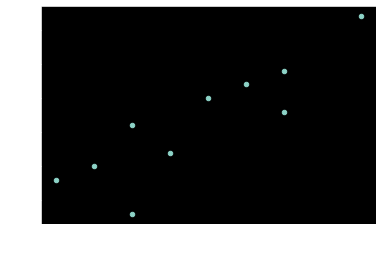

In [28]:
%matplotlib inline
tabela_2_4.plot.scatter(x='y',y='x')
plt.style.use('dark_background')

Neste exemplo temos um gráfico de dispersão que nos mostra que a medida que a variável y aumenta, a variável x também aumenta. Assim identificamos uma associação linear e positiva.


No exemplo a seguir temos a renda bruta de 10 famílias e a porcentagem da renda gasta com assistencia médica:

In [29]:
# Criando tabela de dados
tabela_2_5 = pd.DataFrame ({'x': [12,16,18,20,28,30,34,40,42,50],
                            'y': [7.2,7.4,6.8,6.5,6.3,6.5,5.5,5.5,5.2,5]})
#export
#tabela_2_5.to_csv('Tabelas/tabela_2_5.csv',index = False)

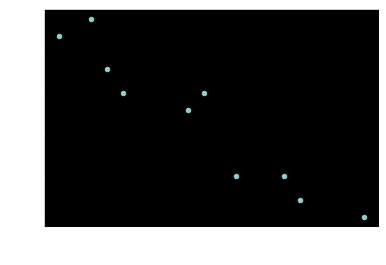

In [31]:
%matplotlib inline
tabela_2_5.plot.scatter(x='x',y='y')
plt.style.use('dark_background')

Observamos neste exemplo uma associação negativa, conforme a renda aumenta, a porcentagem do salário gasto com médicos diminui.

Por fim vamos analisar um último exemplo em que não conseguimos observar nenhuma associação (gráfico com padrão aleatório):

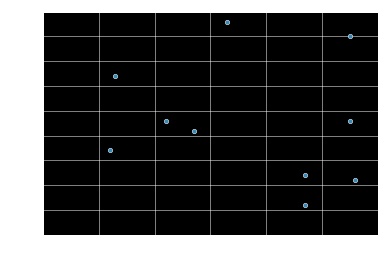

In [73]:
# Criando tabela de dados
np.random.seed(30)
tabela_2_6 = pd.DataFrame ({'x': np.random.randint(40,90,10),
                            'y': np.random.randint(340,380,10)})
#export
#tabela_2_6.to_csv('Tabelas/tabela_2_5.csv',index = False)

# Plotando
%matplotlib inline
tabela_2_6.plot.scatter(x='x',y='y')
plt.style.use('dark_background')

# Medida de associação de variáveis quantitativas

Da mesma forma que pretendemos medir o quanto duas variáveis qualitativas são associadas, queremos o mesmo para as variáveis quantitativas.

Aqui iremos apresentar a teoria de um método simples, porém poderoso para relações lineares: O coeficiente de correlação linear. (lembre-se que relações lineares se refere a relações que se aproximam de uma reta)

Nossa medida irá variar da mesma forma que o coeficiente de pearson ajustado: entre -1 e 1.

Quanto mais próximo de -1, mais forte é a associação negativa, e quanto mais próximo de 1 mais forte a associação é positiva. (próximo de 0 nos indica que não existe associação captada por este método).

Agora iremos entender o raciocínio desta medida:

Imagine um gráfico de dispersão que a origem fica exatamente no meio da nuvem de pontos. Caso tenhamos uma associação positiva neste caso, teremos pontos principalmente entre o 1ª e o 3ª quadrante  do gráfico. 
Lembre do sistema cartesiano: pontos no 1ª quadrante tem valores positivos: [+,+], e pontos no 3ª quadrante tem valores negativos [-,-]. FIca fácil observar que ao realizar o produto de pontos situados no 1ª e 3ª quadrante sempre teremos um valor positivo! Assim conforme formos somando o produto dos pontos de uma associação positiva, sempre teremos um valor positivo na nossa medida.

Como isso pode ser feito na prática se a origem não fica exatamente no meio da nuvem de pontos? simplesmente mudando a origem do sistema através de uma transformação! 

Vamos transformar a origem da tabela_2_4 para mostrar visualmente a teoria.

A transformação mais conveniente é a de colocar a origem na média dos valores ($\bar{x}$), assim nossos novos valores passam a ser: $x_t = x_i - \bar{x}$ 

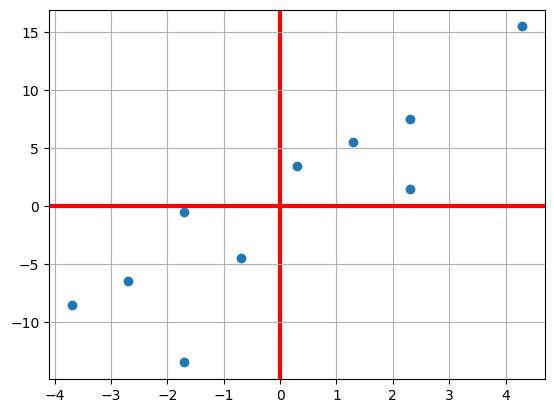

In [96]:
import statistics
%matplotlib inline
# Calcular novos valores de x e y centrados na média da tabela 2_4 (associacao positiva)

y = tabela_2_4['x'] - statistics.mean(tabela_2_4['x'])

x = tabela_2_4['y'] - statistics.mean(tabela_2_4['y'])

# plotando diagrama de dispersão com highlight na origem (centro)
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)
ax.grid()
a = ax.get_xgridlines()
b = a[5]
b.set_color('red')
b.set_linewidth(3)
c = ax.get_ygridlines()
d = c[3]
d.set_color('red')
d.set_linewidth(3)

Repare como com a transformação de origem os pontos ficam entre o quadrante 1 e 3! Isso acontece sempre que houver uma relação linear positiva, e usaremos esse resultado para construir nosso índice.

De forma semelhante, teremos que a soma dos produtos dos pontos de associações negativas sempre serem negativas, note como a dispersão fica em relação a origem (quadrantes 2 e 4, onde teremos pontos com par positivo e negativo, resultando em produto negativo):

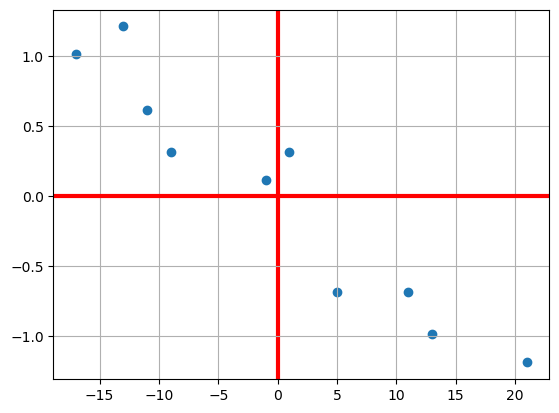

In [104]:
%matplotlib inline
# Calcular novos valores de x e y centrados na média da tabela 2_5 (associacao negativa)

x = tabela_2_5['x'] - statistics.mean(tabela_2_5['x'])

y = tabela_2_5['y'] - statistics.mean(tabela_2_5['y'])

# plotando diagrama de dispersão com highlight na origem (centro)
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)
ax.grid()
a = ax.get_xgridlines()
b = a[4]
b.set_color('red')
b.set_linewidth(3)
c = ax.get_ygridlines()
d = c[3]
d.set_color('red')
d.set_linewidth(3)

E finalmente nos casos em que temos uma nuvem aleatória de pontos, eles se concentram de forma aleatória entre a origem, por isso tende-se que a soma deles se anula e resulta em 0.

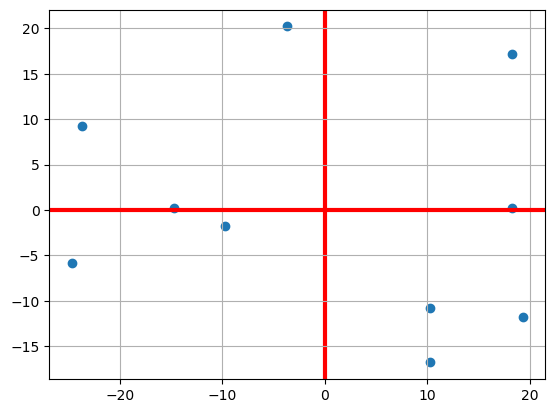

In [107]:
%matplotlib inline
# Calcular novos valores de x e y centrados na média da tabela 2_6 (pontos aleatórios sem associação)

x = tabela_2_6['x'] - statistics.mean(tabela_2_6['x'])

y = tabela_2_6['y'] - statistics.mean(tabela_2_6['y'])

# plotando diagrama de dispersão com highlight na origem (centro)
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)
ax.grid()
a = ax.get_xgridlines()
b = a[3]
b.set_color('red')
b.set_linewidth(3)
c = ax.get_ygridlines()
d = c[4]
d.set_color('red')
d.set_linewidth(3)

Vamos continuar com a construção do índice com a tabela 2_4 que tem uma associação positiva. Note que a variabilidade de X e Y (centrados na media) são diferentes:

In [110]:
y = tabela_2_4['x'] - statistics.mean(tabela_2_4['x'])

x = tabela_2_4['y'] - statistics.mean(tabela_2_4['y'])
print(np.std(x))
print(np.std(y))

2.4103941586387903
8.114801291467339


No caso, a variável y tem uma variância muito maior que x, dessa forma o produto ficaria muito mais afetado pela variável y do que pela x.
Para lidar com este problema, vamos simplesmente colocar as duas variáveis na mesma escala as dividindo pelos seus respectivos desvios padrões:

# $\frac{x_i - \bar{x}}{dp(x)}$

# $\frac{y_i - \bar{y}}{dp(y)}$

Agora que já temos nossa fórmula, vamos calcular os produtos dos pontos conforme o discutido:

In [118]:
# Note que a classificação de x e y ficou invertida na tabela!
y_produtos = (tabela_2_4['x'] - statistics.mean(tabela_2_4['x']))/np.std(tabela_2_4['x'])
print(y_produtos)

x_produtos = (tabela_2_4['y'] - statistics.mean(tabela_2_4['y']))/np.std(tabela_2_4['y'])
print(x_produtos)

0   -1.047469
1   -0.801005
2   -0.061616
3   -0.554542
4   -1.663627
5    0.431311
6    0.677774
7    0.184847
8    0.924237
9    1.910090
Name: x, dtype: float64
0   -1.535019
1   -1.120149
2   -0.705279
3   -0.290409
4   -0.705279
5    0.124461
6    0.539331
7    0.954201
8    0.954201
9    1.783941
Name: y, dtype: float64


Recapitulando: Nós centramos os pontos das variáveis na média e dividimos estes valores pelo desvio padrão, de forma a deixar as duas variáveis na mesma escala.

Note que cada observação nos dá a coordenada do ponto em x e em y do nosso gráfico de dispersão: O ponto 0 tem coordenada [-1.04,-1.53].
Agora que temos nossos pontos de acordo com a teoria, vamos fazer tirar o produto dos pontos e finalmente somar este produto!

In [122]:
# tirando o produto dos pontos e somando-os:

print(np.sum(np.multiply(y_produtos, x_produtos)))

8.767952099440144


8.76! Um valor positivo, demostrando associação positiva conforme o esperado no gráfico.

Lembra que o valor da correlação varia entre -1 e 1? Para obter este resultado final, nós dividimos este valor pela média (número de observações):

In [123]:
print(8.76/10)

0.876


E finalmente obtemos uma correlação de 0.876, note como é próxima de 1. isso indica que é uma associação forte de 87,6%.

vamos conferir o resultado pelo python:

In [129]:
print(np.corrcoef(tabela_2_4['x'], tabela_2_4['y']))

[[1.         0.87679521]
 [0.87679521 1.        ]]


Conforme esperado, a correlação é de 0.876!

Com isso chegamos na fórmula formal da correlação:

# $corr(x,y) = \frac{1}{n}\sum_{i=1}^n \left (\frac{x_i - \bar{x}}{dp(x)}\frac{y_i - \bar{y}}{dp(y)} \right )$

Note que esta medida dá origem a outra medida muito usada na estatística: A covariância, que nada mais é do que a média dos produtos centrados na origem:

# $cov(x,y) = \frac{1}{n}\sum_{i=1}^n \left ((x_i - \bar{x}) (y_i - \bar{y}) \right )$

A covariância segue o mesmo raciocínio usado aqui, porém como ela não é normalizada pelo desvio padrão, ela simplesmente nos dá a tendência da relação linear (se é positiva, negativa ou inexistente). Mas ela não nos mostra o quão correlacionada uma variável está com a outra, por que podemos ter a influência de valores muito grandes de uma variável influenciando a outra, para medir isto usamos a correlação!

# Associação entre variáveis qualitativas e quantitativas

Neste caso vamos analisar como as variáveis qualitativas se comportam dentro de cada categoria quantitativa. 

In [21]:
# Lendo tabela
tab2_6 = pd.read_csv("Tabelas/tab2_6.csv",decimal=',')
print(tab2_6.head(5))

  Estado Civil   Grau de Instrução  N de Filhos  Salario (x Sal Min)  Anos  \
0     solteiro  ensino fundamental          NaN                 4.00    26   
1       casado  ensino fundamental          1.0                 4.56    32   
2       casado  ensino fundamental          2.0                 5.25    36   
3     solteiro        ensino médio          NaN                 5.73    20   
4     solteiro  ensino fundamental          NaN                 6.26    40   

   Meses Região de Procedência  
0      3              interior  
1     10               capital  
2      5               capital  
3     10                 outra  
4      7                 outra  


In [23]:
# Fazendo tabela descritiva para o salário dentro do grau de instrução
print(tab2_6[["Grau de Instrução", "Salario (x Sal Min)"]].groupby("Grau de Instrução").describe())

                   Salario (x Sal Min)                                       \
                                 count       mean       std    min      25%   
Grau de Instrução                                                             
ensino fundamental                12.0   7.836667  2.956464   4.00   6.0075   
ensino médio                      18.0  11.528333  3.715144   5.73   8.8375   
superior                           6.0  16.475000  4.502438  10.53  13.6475   

                                            
                       50%      75%    max  
Grau de Instrução                           
ensino fundamental   7.125   9.1625  13.85  
ensino médio        10.910  14.4175  19.40  
superior            16.740  18.3775  23.30  


Podemos ver pela descritiva que a média do salário aumenta (e muito) conforme o grau de instrução. Vamos visualizar por um box-plot:

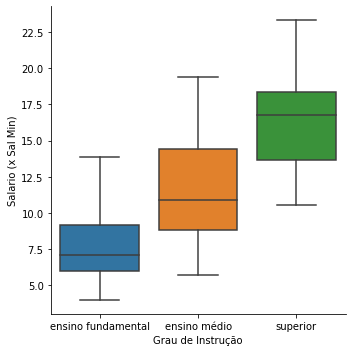

In [19]:
import seaborn as sns
sns.catplot(x="Grau de Instrução", y="Salario (x Sal Min)", kind="box", data = tab2_6)

Porém nem sempre essa relação é clara, por exemplo se análisarmos o salário por região:

                      Salario (x Sal Min)                                    \
                                    count       mean       std   min    25%   
Região de Procedência                                                         
capital                              11.0  11.455455  5.476653  4.56  7.490   
interior                             12.0  11.550000  5.296055  4.00  7.805   
outra                                13.0  10.445385  3.145453  5.73  8.740   

                                              
                          50%     75%    max  
Região de Procedência                         
capital                 9.770  16.625  19.40  
interior               10.645  14.695  23.30  
outra                   9.800  12.790  16.22  


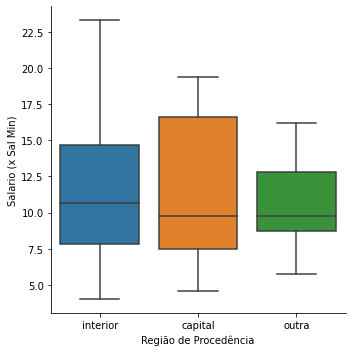

In [24]:
# descritiva para o salário dentro do cada região
print(tab2_6[["Região de Procedência", "Salario (x Sal Min)"]].groupby("Região de Procedência").describe())

# box plot
sns.catplot(x="Região de Procedência", y="Salario (x Sal Min)", kind="box", data = tab2_6)

 Como medimos então o grau de dependência entre uma variável quantitativa e uma qualitativa?
 
 Uma primeira forma pode ser a de olhar a variância da variável quantitativa isolada (chamaremos de variância global) e comparar com a variância da variável quantitativa dentro de cada categoria analisada (local). Se a variância local for menor que a global, isso indica que a variável categória melhora a previsão da quantitativa, assim existindo uma relação entre as variáveis.

In [33]:
# variância global do salário
import statistics
print(statistics.stdev(tab2_6["Salario (x Sal Min)"]))

4.5874575038038605


Comparando o dp global com o local das tabelas acima, vemos que o desvio é menor para as categorias de ensino, porém ele é maior para as regiões (com excessão, por pouco, da categoria outra).

Usando esta teoria vamos criar uma medida-resumo da variância entre as categorias da variável qualitativa. 

Para isso nos vamos usar a média das variâncias, porém ela vai ser ponderada pelo número de observações em cada categoria, assim:

# $\bar{var(S)} = \frac{\sum_{i=1}^k n_i var_i(S)}{\sum_{i=1}^k n_i}$

onde k indica o número de categorias, e $var_i(S)$ a variância dentro de cada categoria.

Pode ser demonstrado que essa medida de variância é menor ou igual a global. Dessa forma podemos definir nossa medida como:

# $R^2 = \frac{var(S) - \bar{var(S)}}{var(S)} = 1 - \frac{\bar{var(S)}}{var(S)}$

Dessa forma, quanto menor nossa variação construída for menor que a global, mais próximo nosso índice fica de 1. Se ela for exatamente igual a global, nosso índice é 0 (indicando 0% de associação).

Vamos analisar nosse exemplo!
Primeiro vamos encontrar a variância global

In [37]:
print(statistics.variance(tab2_6["Salario (x Sal Min)"]))

21.04476634920635


Agora vamos construir a $\bar{var(S)}$ para os dois grupos, vamos usar a tabela para pegar os valores:

In [51]:
print(tab2_6[["Grau de Instrução", "Salario (x Sal Min)"]].groupby("Grau de Instrução").describe())

# usando a fórmula apresentada para criar a variancia do agrupada por grau de instrucao
bvar_instrucao = ((12*(2.95**2)) + (18*(3.71**2)) + (6*(4.5**2)))/(12+18+6)
print(bvar_instrucao)

                   Salario (x Sal Min)                                       \
                                 count       mean       std    min      25%   
Grau de Instrução                                                             
ensino fundamental                12.0   7.836667  2.956464   4.00   6.0075   
ensino médio                      18.0  11.528333  3.715144   5.73   8.8375   
superior                           6.0  16.475000  4.502438  10.53  13.6475   

                                            
                       50%      75%    max  
Grau de Instrução                           
ensino fundamental   7.125   9.1625  13.85  
ensino médio        10.910  14.4175  19.40  
superior            16.740  18.3775  23.30  
13.157883333333334


In [56]:
print(tab2_6[["Região de Procedência", "Salario (x Sal Min)"]].groupby("Região de Procedência").describe())

# usando a fórmula apresentada para criar a variancia do agrupada por regiao
bvar_regiao = ((11*(5.3**2)) + (12*(5.1**2)) + (13*(3.1**2)))/(11+12+13)
print(bvar_regiao)

                      Salario (x Sal Min)                                    \
                                    count       mean       std   min    25%   
Região de Procedência                                                         
capital                              11.0  11.455455  5.476653  4.56  7.490   
interior                             12.0  11.550000  5.296055  4.00  7.805   
outra                                13.0  10.445385  3.145453  5.73  8.740   

                                              
                          50%     75%    max  
Região de Procedência                         
capital                 9.770  16.625  19.40  
interior               10.645  14.695  23.30  
outra                   9.800  12.790  16.22  
20.723333333333336


Agora que temos a variancia global e a local, vamos calcular o $R^2$ para os dois grupos e analisar o quão associadas estas variáveis estão:

In [60]:
r_instrucao = 1 - (13.14/21.04)
print(r_instrucao)

r_regiao= 1 - (20.72/21.04)
print(r_regiao)

0.3754752851711026
0.01520912547528519


Conforme o esperado, existe uma associação bem mais forte entre instrucao e salário (37,5%) do que entre regiao e salario (1,5%)

**Note que os valores estão levemente diferentes do livro devido a fórmula que os pacotes utilizados calculam a variância, a fórmula do pacote deve estar calculando a variancia amostral enquanto o livro está calculando a populacional**

#  qxq

Suponhamos que temos duas variáveis medidos pela mesma unidade (por exemplo, a temperatura de duas cidades diferentes).

O gráfico qxq é um gráfico dos quantis de uma variável vs os quantis da outra. Como no gráfico os valores estão ordenados, eles nos mostra se valores pequenos de X estão relacionados com valores pequenos de Y, valores médios com valores médios e assim por diante. (Isto é diferente do gráfico de dispersão que nos dá apenas uma ideia global da associação entre as variáveis).